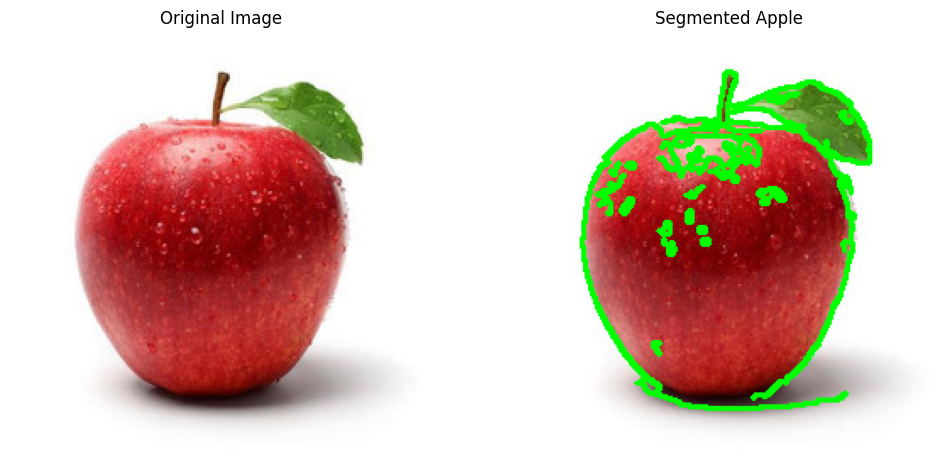

In [5]:
# Task 5
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image
image_path = r'C:\Users\user\Downloads\DIP_Lab_task_05.jpg'
image = Image.open(image_path)
image_array = np.array(image)

# Display the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array)
plt.axis('off')

# Convert image to grayscale if it's not already
gray_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY) if len(image_array.shape) == 3 else image_array

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred_image, 50, 150)

# Apply Otsu's thresholding to segment the apple
_, binary_image = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
segmented_image = image_array.copy()
cv2.drawContours(segmented_image, contours, -1, (0, 255, 0), 2)

# Display the segmented image
plt.subplot(1, 2, 2)
plt.title("Segmented Apple")
plt.imshow(segmented_image)
plt.axis('off')
plt.show()
